<a href="https://colab.research.google.com/github/ichelmichelll/DataAnalyticsDiabetesPrediction/blob/main/DATA_ANALYTICS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPROCESSING

In [ ]:
#importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split #used for training machine learning model + test its performance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#start mounting of google drive (because file is in google drive)

drive.mount('/content/drive', force_remount=True)

file_path = '/content/drive/My Drive/diabetesprediction/diabetes.csv'

!ls "/content/drive/My Drive/diabetesprediction/diabetes.csv"

Mounted at /content/drive
'/content/drive/My Drive/diabetesprediction/diabetes.csv'


In [ ]:
#reading file path and preview top 5 rows of the dataaset
file_path = '/content/drive/My Drive/diabetesprediction/diabetes.csv'
diabetes = pd.read_csv(file_path)

print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
#checking columns of the csv file
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
#find the dimension of the data

print("dimension  of the data: {}".format(diabetes.shape))

dimension  of the data: (768, 9)


Outcome
0    500
1    268
dtype: int64


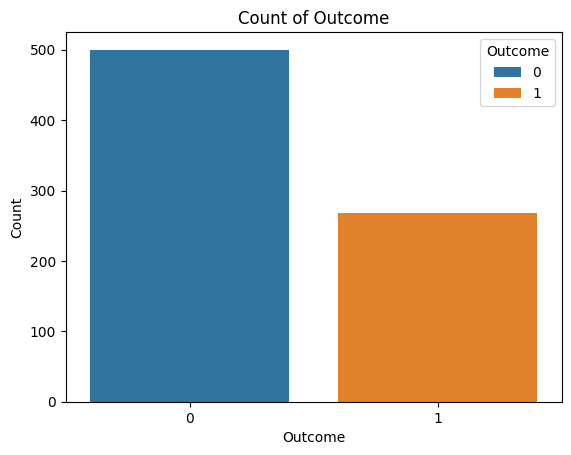

In [ ]:
#grouping data based on the outcome
print(diabetes.groupby('Outcome').size())

sns.countplot(data=diabetes, x='Outcome', hue='Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Outcome')
plt.legend(title='Outcome')
plt.show()

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#check missing values in variables
# 0 = no missing values

print(diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


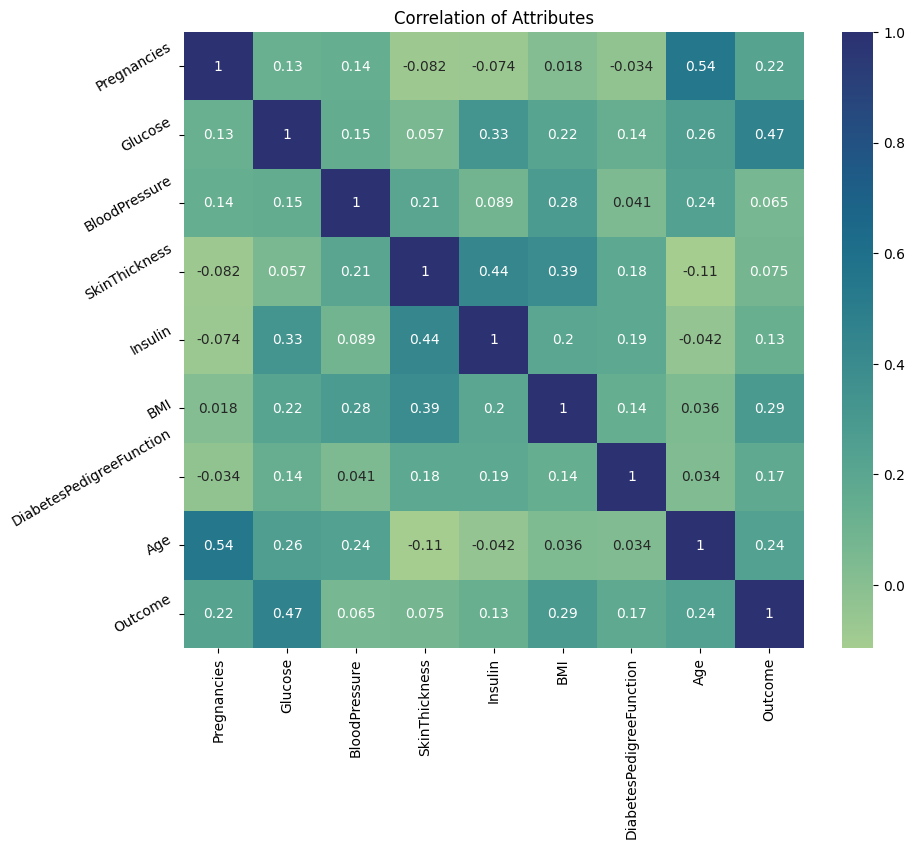

In [ ]:
#Find correlation between each attribute
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes')
graph = sns.heatmap(diabetes.corr(), annot=True, linecolor='white', cmap="crest")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_yticklabels(graph.get_yticklabels(), rotation=30)
plt.show()

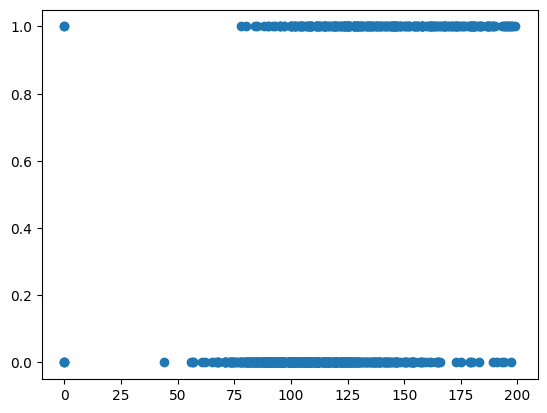

In [ ]:
#Finding outliers
x = np.array(diabetes['Glucose'])
y = np.array(diabetes['Outcome'])
plt.scatter(x,y)
plt.show()

# KNN TRAINING

0.776536312849162
0.7835497835497836


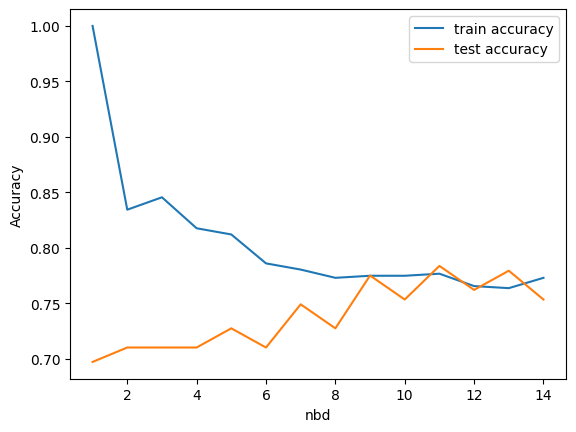

In [ ]:
#KNN TRAINING

x_train, x_test, y_train, y_test=train_test_split(diabetes.loc[:,diabetes.columns!='Outcome'], diabetes['Outcome'], random_state=123, train_size=.7)

train_accuracy = []
test_accuracy = []

nbd = range(1,15)

for n_nbd in nbd:

    knn = KNeighborsClassifier(n_neighbors=n_nbd)
    knn.fit(x_train, y_train)

    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.plot(nbd, train_accuracy, label = "train accuracy")
plt.plot(nbd, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("nbd")

plt.legend()

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

In [ ]:
#Decision Tree to predict diabetes

tree = DecisionTreeClassifier(random_state=0)

tree.fit(x_train, y_train)
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

print(" ")

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(x_train, y_train)

print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))

1.0
0.7186147186147186
 
0.7560521415270018
0.7272727272727273


In [ ]:
#Prediction Result, k=5
classifier= KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1
 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 1 0]


# EVALUATION


In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[118  25]
 [ 38  50]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       143
           1       0.67      0.57      0.61        88

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.72      0.73      0.72       231



Predicted,0,1,All
Actual,,,
0,118,25,143
1,38,50,88
All,156,75,231


Text(0, 0.5, 'Mean Error')

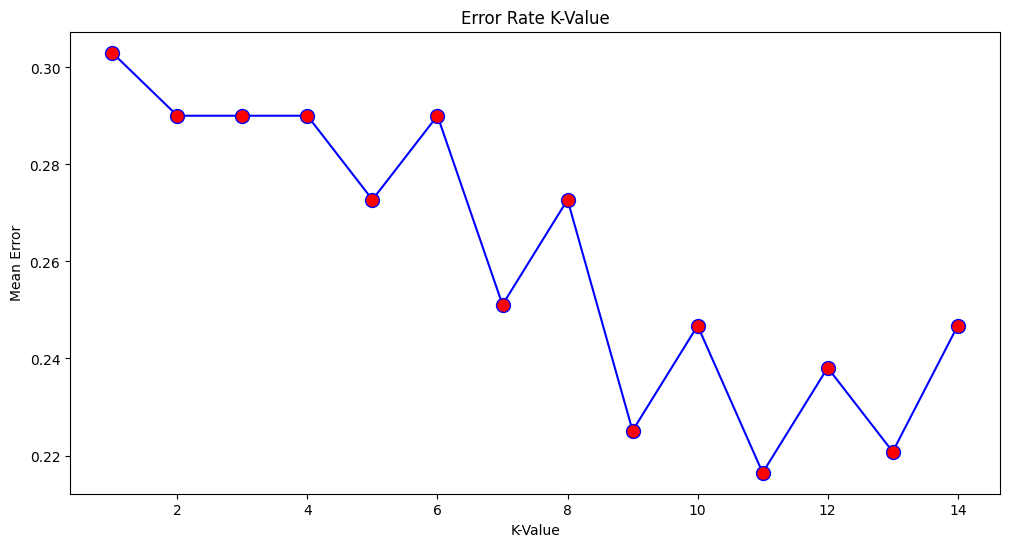

In [ ]:
#Compare Error Rate and K-Value
error = []
# Calculating error for K values between 1 and 15
for j in range (1,15):
  knn=KNeighborsClassifier(n_neighbors=j)
  knn.fit(x_train, y_train)
  pred_j=knn.predict(x_test)
  error.append(np.mean(pred_j != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1,15), error, color='blue', linestyle='-', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate K-Value')
plt.xlabel('K-Value')
plt.ylabel('Mean Error')

In [ ]:
#The smallest mean error is at k = 11
#Training
classifier1 = KNeighborsClassifier(n_neighbors=11)
classifier1.fit(x_train, y_train)

#Prediction
y_pred2=classifier1.predict(x_test)
print(y_pred2)

[1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1
 0 0 1 0 0 0 0 0 0]


In [ ]:
#Confusion Matrix, k = 11
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[126  17]
 [ 33  55]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       143
           1       0.76      0.62      0.69        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



Predicted,0,1,All
Actual,,,
0,118,25,143
1,38,50,88
All,156,75,231
